In [18]:
from datetime import datetime
import os
import re
import requests
import time
import urllib

from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pandas as pd
import wordcloud as wc

from imdb_helper_functions import *
from imdb_code import get_actors_by_movie_soup, get_movies_by_actor_soup, \
get_movie_distance, get_movie_descriptions_by_actor_soup

In [12]:
top_actors = ['Dwayne Johnson',
'Chris Hemsworth',
'Robert Downey Jr.',
'Akshay Kumar',
'Jackie Chan',
'Bradley Cooper',
'Adam Sandler',
'Scarlett Johansson',
'Sofia Vergara',
'Chris Evans']

In [62]:
distance_pairs = pd.DataFrame()
movie_distances_file = 'movie_distances.csv'

if os.path.isfile(movie_distances_file):
    distance_pairs = pd.read_csv(movie_distances_file)

if distance_pairs.empty:
    actors_url_dict = get_actor_url_by_name(top_actors)
    actors_url_list = []
    distance_pairs = {'actor_from': [], 'actor_to': [], 'distance': []}

    for name, url in actors_url_dict.items():
        actors_url_list.append((name, url))

    for i in range(0, 10):
        for j in range(i+1, 10):
            distance = get_movie_distance(actors_url_list[i][1], actors_url_list[j][1], 5, 5)
            distance_pairs['actor_from'].append(actors_url_list[i][0])
            distance_pairs['actor_to'].append(actors_url_list[j][0])
            distance_pairs['distance'].append(distance)

    distance_pairs = pd.DataFrame(distance_pairs)
    distance_pairs.to_csv('movie_distances.csv', index=False)

In [64]:
node_list = set()
edge_labels = {}

G = nx.Graph()

for index, row in distance_pairs.iterrows():
    node_list.add(row['actor_from'])
    node_list.add(row['actor_to'])
    
    if row['distance'] != float("inf"):
        edge_labels[(row['actor_from'], row['actor_to'])] = int(row['distance'])

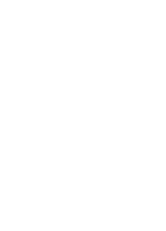

In [70]:
G = nx.Graph()
# pos=nx.spring_layout(G)

plt.subplot(121)

G.add_nodes_from(list(node_list))
G.add_edges_from(edge_labels.keys())

plt.axis('off')
plt.show()

In [10]:
url = 'https://www.imdb.com/name/nm0262635/'
    
actor_soup = get_actor_movie_soup(url)

result = get_movie_descriptions_by_actor_soup(actor_soup)

['A detective investigates the death of a patriarch of an eccentric, combative family.',
 "Israel's Mossad agents attempt to rescue Ethiopian Jewish refugees in Sudan in 1979.",
 "After the devastating events of Avengers: Infinity War (2018), the universe is in ruins. With the help of remaining allies, the Avengers assemble once more in order to reverse Thanos' actions and restore balance to the universe.",
 "Carol Danvers becomes one of the universe's most powerful heroes when Earth is caught in the middle of a galactic war between two alien races.",
 'The Avengers and their allies must be willing to sacrifice all in an attempt to defeat the powerful Thanos before his blitz of devastation and ruin puts an end to the universe.',
 'Peter Parker balances his life as an ordinary high school student in Queens with his superhero alter-ego Spider-Man, and finds himself on the trail of a new menace prowling the skies of New York City.',
 'Frank, a single man raising his child prodigy niece Ma